In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


<img src="img/company-logo.png" width=120 height=120 align="right">

Author: Prof. Manoel Gadi

Contact: manoelgadi@gmail.com

Teaching Web: http://mfalonso.pythonanywhere.com

Linkedin: https://www.linkedin.com/in/manoel-gadi-97821213/

Github: https://github.com/manoelgadi

Last revision: 27/October/2022



# Session 2 - Exploratory Data Analysis in Python

## Python Ecosystem
<img src="img/scipy_ecosystem.png" width=400 height=300 align="left">

## Python Pandas DataFrame
A **DataFrame** in pandas is a tabular, spreadsheet-like (Excel-like) structure with an **ordered** collection of columns, each with potentially a different type.

<img src="img/pandas_df_structure.png" width=400 height=300 align="left">


Like in Excel, DataFrames have **both** column name and row indexes:
* .iloc (index locator) accessing the data via a list [0,1,2,...,N] and 
* .loc accessing the data as dictionary {key:value}. 

There will be more tecninical details about pandas in further classes... Let's play with its basic functionalities first.

## Growing with Pandas - Reading files using Pandas

importing pandas library with an alias

In [ ]:
import pandas as pd

### importing dataset using pd.read_excel() function

In [ ]:
df = pd.read_excel("datasets/yahoo.xlsx")
df.head(2)

,Unnamed: 0,ticker,country,sector,RefIndex,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio,...,Trailing Annual Dividend Rate,Trailing Annual Dividend Yield,5 Year Average Dividend Yield,Payout Ratio,Dividend Date,Ex-Dividend Date,Last Split Factor,Last Split Date,ScrapedName,Sector
0,0,GOOG,USA,Technology,SPY,818.1B,712.95B,50.67,24.46,1.70,...,NaN,NaN,NaN,0.00%,NaN,NaN,10000000/10000000,"Apr 27, 2015",Alphabet Inc. (GOOG),Technology
1,1,MSFT,USA,Technology,SPY,879.31B,830.01B,53.84,23.26,2.14,...,1.68,1.47%,2.35,77.46%,"Dec 13, 2018","Nov 14, 2018",2/1,"Feb 18, 2003",Microsoft Corporation (MSFT),Technology


## import SAS dataset using pd.read_spss() function

In [ ]:
df = pd.read_sas("datasets/DCSKINPRODUCT.sas7bdat")
df.head(2)

,ProductKey,DistributionCenter,DATE,Discount,Revenue
0,"b""Javier's Deep Cleansing Hair Shampoo 2.718 dl""",b'Cary',2013-02-10,0.0,0.0
1,"b""Javier's Deep Cleansing Hair Shampoo 2.718 dl""",b'Cary',2013-02-17,0.0,0.0


## import data from a SQL database

In [ ]:
import sqlite3
conn = sqlite3.connect('datasets/company_balancesheet_database.db')
df = pd.read_sql("""
 SELECT *
    FROM balancesheet
""", conn)
df.head(2)

,id,nif_fical_number_id,company_name,CNAE,p10000_TotalAssets_h0,p10000_TotalAssets_h1,p10000_TotalAssets_h2,p20000_OwnCapital_h0,p20000_OwnCapital_h1,p20000_OwnCapital_h2,...,p40100_40500_SalesTurnover_h0,p40100_40500_SalesTurnover_h1,p40100_40500_SalesTurnover_h2,p40800_Amortization_h0,p40800_Amortization_h1,p40800_Amortization_h2,p49100_Profit_h0,p49100_Profit_h1,p49100_Profit_h2,detailed_status
0,1,A28015865,"Telefonica, SA",6420,1.150660e+08,1.236410e+08,1.203290e+08,26618000.0,28385000.0,25436000.0,...,52455000.0,52574000.0,55665000.0,-9396000.0,-9649000.0,-9704000.0,6791000.0,5469000.0,3525000.0,Activa
1,2,A39000013,Banco Santander SA,6419,1.444305e+09,1.339125e+09,1.340260e+09,106833000.0,102699000.0,98753000.0,...,50321000.0,46192000.0,48130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## import data from HTML directly from a Website!

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')

In [ ]:
type(df)

list

In [ ]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Election results from statewide races')

In [ ]:
df = table_MN[0]
df.head(2)

,Year,Office,GOP,DFL,Others
0,2020,President,45.3%,52.4%,2.3%
1,2020,Senator,43.5%,48.8%,7.7%


## import dataset using pd.read_csv() function

In [ ]:
df = pd.read_csv("datasets/anorexia.csv")
df.head(2)

,ID,group,prewt,postwt,difwt
0,101,1,80.5,82.2,1.7
1,201,2,80.7,80.2,-0.5


---
## Exercise

Import 2 datasets into 2 different dataframes:
* census_train.csv
* census_test.csv

---

# Descriptive statistics

Descriptive statistics is the process of describing the sample.
For this, centrality measures, dispersion measures, distribution form and outliers are used.
Visualizations can also be used to explore and make sense of the data.




## PART 1 - Measures of central tendency

### Mean (Arithmetic Mean or Arithmetic Average)

The mean (or average) is the most popular and well-known measure of central tendency. It can be used with both discrete and continuous data, although its use is more frequent with continuous data. The average is equal to the sum of all the values in the data set divided by the number of values in the data set. Therefore, if we have n values in a data set and they have values x1, x2, ..., xn, the mean of the sample, usually denoted by (pronounced x bar):

\begin{equation*}
\overline{x} =
\frac{( x_1 + x_2 + ... + x_n )} {N}
\end{equation*}

This formula is usually written in a slightly different way using the Greek capital letter, which is pronounced "sigma," which means "sum of ...":

\begin{equation*}
\overline{x} = \frac{\left( \sum_{k=1}^n x_k \right)} {N}
\end{equation*}

You may have noticed that the above formula refers to the sample mean. So why have we called it a sample mean? This is because, in statistics, samples and populations have very different meanings and these differences are very important, even if, in the case of the average, they are calculated in the same way. To recognize that we are calculating the population mean and not the sample mean, we use the lowercase Greek letter "mu", indicated as µ:

\begin{equation*}
\mu = \frac{\left( \sum_{k=1}^n x_k \right)} {N}
\end{equation*}

Lets calculate some "mean" using Python for the anorexia.csv database

In [ ]:
# import libraries numpy, pandas, and scipy.stats module
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
# import dataset using pd.read_csv() function
df = pd.read_csv("datasets/anorexia.csv")

In [ ]:
df.columns

Index(['ID', 'group', 'prewt', 'postwt', 'difwt'], dtype='object')

In [ ]:
df.prewt.mean()

82.40833333333333

__QUESTION FOR DISCUSSION 1__: is the previous __average__ a __population__ or __sample__ average?

### [Practice 1]: Calculate the average for all variables.



### Median

The median is the medium element for a set of data that have been organized in order of magnitude. The median is less affected by atypical and skewed values. To calculate the median, suppose we have the following data:

In [ ]:
list(df.prewt.head(11))

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]

First we need to reorganize that data in order of magnitude (sort it):

In [ ]:
a = list(df.prewt.head(11));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]


In [ ]:
a.sort();print(a)

[74.0, 80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]


Our median is center value, in this case, 83.3. 

It is the central value because there are exactly 5 scores before and 5 scores after.

In [ ]:
a[5]

83.3

__QUESTION FOR DISCUSSION 2__: is the previous the __median__ for the __population__ or for a __sample__?

---

Using __Numpy__ we can see that the calculation of the median works well and gives us the same result ;-)

In [ ]:
a = list(df.prewt.head(11))
print("list of original first 11 elements = ",a)
a.sort()
print("sorted list of original first 11 elements = ",a)
print("median using NumPy = ",np.median(a))

list of original first 11 elements =  [80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]
sorted list of original first 11 elements =  [74.0, 80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]
median using NumPy =  83.3


Now lets use __Pandas__, which uses Numpy behind the scene, and we get the same result!

In [ ]:
print("median using Pandas, which uses Numpy behind the scence = ",df.prewt.head(11).median())

median using Pandas, which uses Numpy behind the scence =  83.3


---

The previous calcualtion works well when we have an odd number of values! But what happens when you have an even number of values? 

__What if you only had 10 scores?__ Well, you just have to take the average of the two central values. Lets look into the following example:


In [ ]:
a = list(df.prewt.head(10));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6]


In [ ]:
a.sort();print(a)

[80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]


In [ ]:
(a[4] + a[5])/2

83.55

In __Numpy__ we can see that the calculation also works the same way when we have an even number of observations.

In [ ]:
a = list(df.prewt.head(10))
print("list of original first 11 elements = ",a)
a.sort()
print("sorted list of original first 11 elements = ",a)
print("median using NumPy = ",np.median(a))

list of original first 11 elements =  [80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6]
sorted list of original first 11 elements =  [80.5, 80.7, 81.5, 82.6, 83.3, 83.8, 84.9, 86.0, 89.4, 91.8]
median using NumPy =  83.55


Now lets use __Pandas__, which uses Numpy behind the scene, and we get the same result!

In [ ]:
print("median using Pandas, which uses Numpy behind the scene = ",df.prewt.head(10).median())

median using Pandas, which uses Numpy behind the scene =  83.55


### [Practice 2]: Calculate the median for all variables and for all data.



---

## Mode

The mode is the most frequent value in our data set. Mode does not make much sense for continuous numerical values, it is used for __categorical__ data where we want to know what is the most common category. In our examples data we can look at the categorical field __group__

In [ ]:
df.group.head()

0    1
1    2
2    3
3    1
4    2
Name: group, dtype: int64

One can see below that applying mode to the dataframe generates meaningless results

In [ ]:
df.mode()

,ID,group,prewt,postwt,difwt
0,101,1.0,80.5,81.4,-10.2
1,102,NaN,83.3,NaN,-0.7
2,103,NaN,86.0,NaN,-0.1
3,104,NaN,NaN,NaN,3.9
4,105,NaN,NaN,NaN,NaN
...,...,...,...,...,...
67,313,NaN,NaN,NaN,NaN
68,314,NaN,NaN,NaN,NaN
69,315,NaN,NaN,NaN,NaN
70,316,NaN,NaN,NaN,NaN


To calculate the mode in Pandas (via Numpy), we simply use .mode()

In [ ]:
df.group.mode()

0    1
Name: group, dtype: int64

__Bad!__, is it not? Luckly we have __value_counts()__ method!!!

In [ ]:
df.group.value_counts() 

1    29
2    26
3    17
Name: group, dtype: int64

Now, to continue analyzing mode, it would be a good idea to understand a little more about our database and mainly the __group__ column. According to https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/anorexia.html, our database anorexia.csv weight change data for young patients with female anorexia.
This dataset contains the recorded weights of anorexic patients before and after a treatment.

* Group 1: Behavioural therapy
* Group 2: Control group
* Group 3: Family therapy

The Prewt column

      Indicates the patient's weight before the study period, in pounds.

Postwt

      Indicates the patient's weight after the study period, in pounds.

__QUESTION FOR DISCUSSION 3__: What does the previous result mean?

---

It ends up being easier to see this result, if instead of using mode, we directly draw a __frequency table__ and a __histogram graph__ by group.

### Frequency table

In [ ]:
df[['group','ID']].groupby(['group']).count()

,ID
group,
1,29
2,26
3,17


### Histogram graph

To draw the histogram we will use .hist of Pandas, .hist uses methods from Matplotlib. if we call __df.hist(column='group')__ straight away, the graph may not appear, that is because the default behaviour of Matplotlib in a Notebook is returning an object with the graph instead of drawing it.

array([[<AxesSubplot:title={'center':'group'}>]], dtype=object)

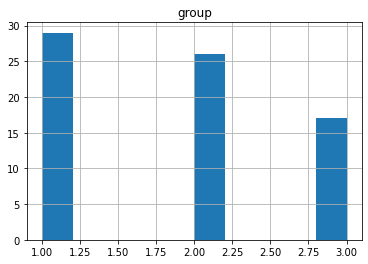

In [ ]:
df.hist(column='group')

Therefore, it is a good idea to include:

    * %matplotlib inline

In Notebook the symbol "%" represent a magic script or magic function.
in this case, matplotlib inline invoke a magic script that changes the default to render/plot the figure in the notebook instead of only dumping the figure as an object.

In [ ]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'group'}>]], dtype=object)

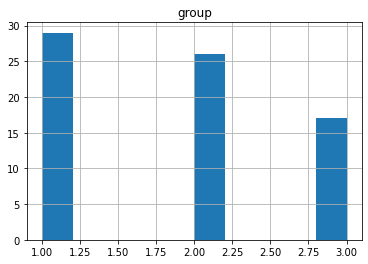

In [ ]:
df.hist(column='group')

### When the categorical variable is not numeric (text for example), we can use values_counts trick to build the histogram:

<AxesSubplot:>

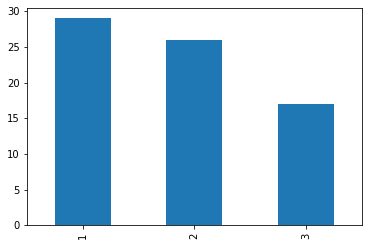

In [ ]:
df['group'].value_counts().plot(kind='bar')

So it looks better that group 1 has more cases, followed by group 2 and then 3, right?

---

__QUESTION FOR DISCUSSION 4__: What information can we get from the average, the median and the mode below?

In [ ]:
df.mean()

ID        197.736111
group       1.833333
prewt      82.408333
postwt     85.172222
difwt       2.763889
dtype: float64

In [ ]:
df.median()

ID        208.50
group       2.00
prewt      82.30
postwt     84.05
difwt       1.65
dtype: float64

In [ ]:
df.group.mode()

0    1
Name: group, dtype: int64

---

In isolation, these metrics say little about our data, but if we apply these metrics in groups 1, 2 and 3 our analysis begins to get interesting.

In [ ]:
df[['difwt','group']].groupby(['group']).mean()

,difwt
group,
1,3.006897
2,-0.450000
3,7.264706


__QUESTION FOR DISCUSSION 5__: What information can we get from the mean (average) by group (that is, by 1-Individual, 2-Control and 3-Family treatment)? What treatment seems to work best?

---

Well, to be sure about our analysis with the measures of central tendency. We need to know the measures of spread of our population.

---

## PART 2 - Measure of Spread

### Min

The min represents the smallest value in a data set. Then we calculate the range as:

\begin{equation*}
Min = [Minimum value]
\end{equation*}

Let's take again the example of the first 11 values of our variable weight __prewt__ that we know indicates the weight of the patient before the study period, in pounds.

In [ ]:
a = list(df.prewt.head(11));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]


In [ ]:
min(a)

74.0

### Max

The max represents the biggest value in a data set. Then we calculate the range as:

\begin{equation*}
Max = [Maximum Value]
\end{equation*}

In [ ]:
max(a)

91.8

### Range

The range has 2 common intepretation:

1. the difference between the biggest and the smallest value
2. the array [smallest, biggest]



For 1, we calculate the range as:
\begin{equation*}
Range = [Manimum Value] - [Minimum Value]
\end{equation*}

Which means:

In [ ]:
max(a)-min(a)

17.799999999999997

For 2, we calculate the range as:
\begin{equation*}
Range = [Minimum Value,Maximum Value]
\end{equation*}

Calculating the range in Pandas (via numpy) for all variables.

In [ ]:
df.groupby(['group']).max()

,ID,prewt,postwt,difwt
group,,,,
1,227,94.9,103.6,20.9
2,226,91.8,89.6,15.9
3,317,94.2,101.6,21.5


In [ ]:
df.groupby(['group']).min()

,ID,prewt,postwt,difwt
group,,,,
1,101,70.0,71.3,-9.1
2,201,70.5,73.0,-12.2
3,301,73.4,75.2,-5.3


In [ ]:
df.groupby(['group']).max() - df.groupby(['group']).min()

,ID,prewt,postwt,difwt
group,,,,
1,126,24.9,32.3,30.0
2,25,21.3,16.6,28.1
3,16,20.8,26.4,26.8


### Standard Deviation

The standard deviation measures the dispersion of the data around the average value. It is useful for comparing data sets that may have the same mean but a different range.

\begin{equation*}
Standard.Deviation = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}
\end{equation*}


In [ ]:
a = list(df.prewt.head(11));print(a)

[80.5, 80.7, 83.8, 84.9, 89.4, 83.3, 81.5, 91.8, 86.0, 82.6, 74.0]


In [ ]:
x_bar = df.prewt.head(11).mean()
print("mean=",x_bar)

mean= 83.5


In [ ]:
a_sum = 0.0
for x_i in a:
    a_sum = a_sum + (x_i - x_bar)**2
    print ("(x_i - x_bar)^2=(",x_i, "-",x_bar,")^2=", (x_i - x_bar)**2, "| SUM = ", a_sum)

(x_i - x_bar)^2=( 80.5 - 83.5 )^2= 9.0 | SUM =  9.0
(x_i - x_bar)^2=( 80.7 - 83.5 )^2= 7.839999999999984 | SUM =  16.839999999999982
(x_i - x_bar)^2=( 83.8 - 83.5 )^2= 0.08999999999999829 | SUM =  16.929999999999982
(x_i - x_bar)^2=( 84.9 - 83.5 )^2= 1.960000000000016 | SUM =  18.889999999999997
(x_i - x_bar)^2=( 89.4 - 83.5 )^2= 34.810000000000066 | SUM =  53.70000000000006
(x_i - x_bar)^2=( 83.3 - 83.5 )^2= 0.04000000000000114 | SUM =  53.74000000000006
(x_i - x_bar)^2=( 81.5 - 83.5 )^2= 4.0 | SUM =  57.74000000000006
(x_i - x_bar)^2=( 91.8 - 83.5 )^2= 68.88999999999996 | SUM =  126.63000000000002
(x_i - x_bar)^2=( 86.0 - 83.5 )^2= 6.25 | SUM =  132.88000000000002
(x_i - x_bar)^2=( 82.6 - 83.5 )^2= 0.8100000000000103 | SUM =  133.69000000000003
(x_i - x_bar)^2=( 74.0 - 83.5 )^2= 90.25 | SUM =  223.94000000000003


In [ ]:
import math
print("Standard Deviation = ", math.sqrt(a_sum/(len(a)-1)))

Standard Deviation =  4.732229918336598


But in Python Pandas we can use __std__ ;-)

In [ ]:
df.prewt.head(11).std()

4.732229918336598

### Quartiles and Interquartile Range

The quartiles give us information about the propagation of a data set by dividing the data set into 4 groups. 

Just as the median divides into N = 2 groups taking 1 central element (or the average of the two central elements), the operation to find the quartiles (N = 4) divides the data into 4 groups using 3 borders (N-1 borders generate N groups) and the borders are the 25% percentile element, the 50% percentile element (median) and the 75% percentile element.

First quartile - 25% percentile

In [ ]:
df.prewt.quantile(0.25) # 25% percentil - Primero cuartil

79.6

Second quartile - The same as the median - 50% percentile

In [ ]:
df.prewt.quantile(0.50)

82.3

In [ ]:
df.prewt.median()

82.3

Third quartile - 75% percentile

In [ ]:
df.prewt.quantile(0.75)

86.0

---

# Describe

Luckly, in Pandas we have the __describe__ method, which gathers measures of central tendency and dispersion in a single operation!


In [ ]:
df.prewt.describe()

count    72.000000
mean     82.408333
std       5.182466
min      70.000000
25%      79.600000
50%      82.300000
75%      86.000000
max      94.900000
Name: prewt, dtype: float64

The __loop__ below prints the __describe__ function by group for each of the continuous variables.

In [ ]:
for var in ['prewt', 'postwt', 'difwt']:
    print("VARIABLE = ", var)
    print(df[[var,'group']].groupby(['group']).describe())
    print("---")    

VARIABLE =  prewt
      prewt                                                        
      count       mean       std   min     25%    50%     75%   max
group                                                              
1      29.0  82.689655  4.845495  70.0  80.400  82.60  85.000  94.9
2      26.0  81.557692  5.707060  70.5  77.725  80.65  85.875  91.8
3      17.0  83.229412  5.016693  73.4  80.500  83.30  86.000  94.2
---
VARIABLE =  postwt
      postwt                                                        
       count       mean       std   min     25%   50%     75%    max
group                                                               
1       29.0  85.696552  8.351924  71.3  81.900  83.9  90.900  103.6
2       26.0  81.107692  4.744253  73.0  77.575  80.7  84.675   89.6
3       17.0  90.494118  8.475072  75.2  90.700  92.5  95.200  101.6
---
VARIABLE =  difwt
      difwt                                                 
      count      mean       std   min  25%   50%   75%

Perhaps the power of all this information for analysis is more evident in a __BoxPlot chart__:

### BoxPlot chart

Group 1: Individual cognitive behavior therapy


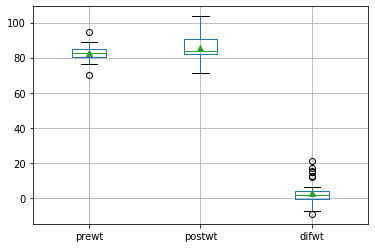

In [ ]:
print("Group 1: Individual cognitive behavior therapy")
boxplot = df[df.group == 1].boxplot(column=['prewt', 'postwt', 'difwt'],showmeans=True)


Group 2: Control Group


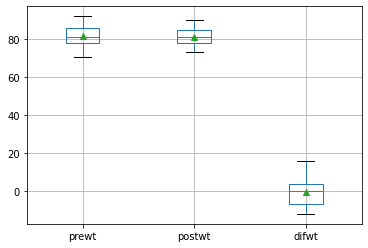

In [ ]:
print("Group 2: Control Group")
boxplot = df[df.group == 2].boxplot(column=['prewt', 'postwt', 'difwt'],showmeans=True)

Group 3: Family therapy


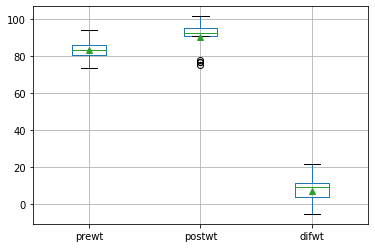

In [ ]:
print("Group 3: Family therapy")
boxplot = df[df.group == 3].boxplot(column=['prewt', 'postwt', 'difwt'],showmeans=True)

__QUESTION FOR DISCUSSION 6__: With all that information in hand, what treatment seems to work best?

---

#### Conclusions

The way we decide to analyze the data can lead to completely different results.
You can often impact (intentionally or not) on what people take for granted depending on how the results are communicated.

#### Tips

Be skeptical of your results and those that provide others.
Consider other ways to analyze the data and if you chose it correctly.


# RECAP: WHICH DATAFRAME METHODS SHOULD YOU REMEMBER AFTER THIS CLASS?

* __describe()__:df.describe() - summary statistics of numeric variables
* __value_counts()__: df.group.value_counts() - frequency table applicable for categorical variables
* __plot()__: df['group'].plot(kind='bar') - for creating histograms of numeric variables
* __value_counts().plot()__: df['group'].value_counts().plot(kind='bar') - for creating histograms of text variables

## NICE TO REMBER:
* __groupby()__: df[['group','ID']].groupby(['group']).count() - df.groupby to do analysis by group like in SQL: 
SELECT COUNT(*) FROM df GROUP BY group;

# What should you know so far?

* df.head()
* df.describe()
* df.value_counts()
* df.groupby('column_name').describe()
    

Let's hear a "AMAZING" song: <a href="https://youtu.be/1ftw05DYasM"> https://youtu.be/1ftw05DYasM </a>

<a href="https://youtu.be/1ftw05DYasM"> <img src="img/head_describe_value_counts_song.png" width=400 height=300 align="center"> </a>

---

# Kahoot time

---

# Exercise 2:
1. Import pandas and then import census_train.csv database located at datasets
1. Identify the data type of all variables
1. Make an analysis of this database using the tools we have previously learned [Measures of central tendency and Measures of dispersion] according to the type of the variable.
1. Make histogram of at least one nominal categorical variables. (hint: note that for making a histogram of a text variable you need to use value_counts to create a value:count first, like in this example: df['group'].value_counts().plot(kind='bar')
1. Choose at least one nominal categorical variable and calculate the [Measures of central tendency and Dispersion measures] for the other variables by the groups of the chosen categorical variable - see the example of the __loop for__ previously used in this code.

---

# Bonus material part - for those that want to go more in depth: Some advanced statistics in Python

# 1. Introduction: ```scipy.stats``` module

The SciPy library has many modules, each aiming to solve or handle specific purposes related to science. The scope of the modules themselves can be daunting, and without knowing when and where to use them, it is easy to overlook the library's usefulness. This exercise sticks to using one of the basic module called ```scipy.stats```. 

```scipy.stats``` contains a large number of probabilitiy distributions and statistical functions. It is an extension to NumPy's own stats module, though the number and variety of functions are much more diverse.

The SciPy library has its own [documentation](https://docs.scipy.org/doc/scipy/reference/), which you could refer to.

# 2. Loading libraries and dataset

You can import specific modules of SciPy using ```import scipy.[module_name]``` format. Note that it is convention to import specific module directly to the workspace for SciPy. This avoids possible clash of named global variables that are defined in other modules. 

Also note that SciPy is built on top of NumPy, NumPy is automatically imported too when SciPy is imported. However, calling NumPy separately avoids any confusion when calling a module specific function.

In [ ]:
# import libraries numpy, pandas, and scipy.stats module

import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
# import dataset using pd.read_csv() function
df = pd.read_csv("datasets/anorexia.csv")

In [ ]:
# view first few rows of the dataset using pandas dataframe.head() function
df.head()

,ID,group,prewt,postwt,difwt
0,101,1,80.5,82.2,1.7
1,201,2,80.7,80.2,-0.5
2,301,3,83.8,95.2,11.4
3,102,1,84.9,85.6,0.7
4,202,2,89.4,80.1,-9.3


This dataset contains the recorded weights of anorexic patients before and after a treatment.

* Group 1: Behavioural therapy
* Group 2: Control group
* Group 3: Family therapy

We can use various statistical tools in the scipy.stats module to perform descriptive statistics and statistical tests.

# 3. Statistical tests

## 3-1. Are the weights normally distributed? (Normality tests)

There are various ways in which we can test if a given set of data is normally distributed or not.

Here we introduce these:
* [```scipy.stats.normaltest(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#r676), where x is the data array
* [```scipy.stats.shapiro(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), where x is the data array

Both tests are used to determine whether or not a dataset comes from a normal distribution. For both tests, the hypothesis is as follows:

* H0: Sample comes from a normal distribution
* H1: Sample does not come from a normal distribution.

As in the case of the modules, you can access functions of stats module using ```stats.[function_name]``` format.

In [ ]:
# use the normaltest function to find the test statistic and p-value
# of 'prewt', 'postwt', and 'difwt' column, and print each of them.
# since pandas dataframe is also built on top of arrays,
# you can use the dataframe column selection method directly to use the normaltest

print("pre-weight normal test:",stats.normaltest(df['prewt']))
print("\npost-weight normal test:",stats.normaltest(df['postwt']))
print("\nweight difference normal test:",stats.normaltest(df['difwt']))

pre-weight normal test: NormaltestResult(statistic=0.07182332731282798, pvalue=0.9647255100433293)

post-weight normal test: NormaltestResult(statistic=4.872229098757813, pvalue=0.08750016942113438)

weight difference normal test: NormaltestResult(statistic=2.1365312271308587, pvalue=0.34360394293797336)


As you can see, the function returns 2 values: the test statistic, and the p-value. If you want to access a particular value of the two, you can use the slicing method or assign both values to a new variable at the same time.

```
# slicing:
p_value = stats.normaltest(x)[1]

# variable assignment
test_statistic, p_value = stats.normaltest(x)
```

The normaltest uses kurtosis and skewness to test normality. We can check the actual kurtosis and skewness values by using [```stats.kurtosis```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) and [```stats.skew```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) functions (note: kurtosis returns excess kurtosis value). You can also run a separate tests using [```stats.kurtosistest```](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.kurtosistest.html) and [```stats.skewtest```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.skewtest.html). 

In [ ]:
# find the excess kurtosis and skewness values
# of'prewt', 'postwt', and 'difwt' columns, and the print the values
# using stats.kurtosis(x) and stats.skew(x)

print("pre-weight excess kurtosis:", stats.kurtosis(df['prewt']))
print("pre-weight skewness:", stats.skew(df['prewt']))

print("\npost-weight excess kurtosis:", stats.kurtosis(df['postwt']))
print("post-weight skewness:", stats.skew(df['postwt']))

print("\nweight difference excess kurtosis:", stats.kurtosis(df['difwt']))
print("weight difference skewness:", stats.skew(df['difwt']))

pre-weight excess kurtosis: -0.08451214729066026
pre-weight skewness: -0.04790844505142429

post-weight excess kurtosis: -0.7529474965734595
post-weight skewness: 0.37246586066772885

weight difference excess kurtosis: -0.5587219355778057
weight difference skewness: 0.28246899415470783


Just to verify the normality, use the [```stats.shapiro(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function to conduct the shapiro test on the columns.

In [ ]:
# use the shapiro function to find the test statistic and p-value
# of 'prewt', 'postwt', and 'difwt' column, and print each of them.
# shapiro test also returns test-statistic and p-value respectively

print("pre-weight shapiro test:",stats.shapiro(df['prewt']))
print("\npost-weight shapiro test:",stats.shapiro(df['postwt']))
print("\nweight difference shapiro test:",stats.shapiro(df['difwt']))

pre-weight shapiro test: ShapiroResult(statistic=0.9924839735031128, pvalue=0.948354184627533)

post-weight shapiro test: ShapiroResult(statistic=0.9673006534576416, pvalue=0.05781174451112747)

weight difference shapiro test: ShapiroResult(statistic=0.974664568901062, pvalue=0.15441827476024628)


## 3-2. Have people's weight changed in general before and after the treatments? (one-sample t-test)

Since we already have the values for difference in weight pre and post treatment, we can use one-sample paired t-test on the 'difwt' column to see whether there is a significant change in weights, where the hypothesis is:

* H0: Mean difference is equal to 0
* H1: Mean difference is not equal to 0

We can use the [```stats.ttest_1samp(x, mean)```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html) to conduct the one-sample t-test, where x is the data and mean is the population mean you want to test the data against (in this case, 0). The function returns the test statistic and the p-value respectively.

In [ ]:
# Use the stats.ttest_1samp function to see whether the 'difwt' column
# is different from population mean 0
# and print the result
print(stats.ttest_1samp(df['difwt'], 0))

Ttest_1sampResult(statistic=2.937569718890667, pvalue=0.004457718078670157)


## 3-3. Have people's weight really change as a result of the treatments? (paired t-test)

Now we can check if the actual differences have changed using a paired t-test, as each pre-weight and post-weight has to match for each individual. The hypothesis is similar:

* H0: Mean(preweight) = Mean(postweight)
* H1: Mean(preweight) != Mean(postweight).

We can use the [```stats.ttest_rel(a,b)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) to conduct a paired t-test, where a and b are each of the samples. The function returns the test-statistic and the p-value respectively.

In [ ]:
# use the stats.ttest_rel function to see whether the values of 'prewt' and 'postwt'
# for each individual are significantly different
# and print the result
print(stats.ttest_rel(df['prewt'], df['postwt']))

Ttest_relResult(statistic=-2.9375697188906673, pvalue=0.004457718078670148)


## 3-4. Are the effect of each treatment different from one another? (one-way ANOVA)

Since there are 3 groups, we need to use the ANOVA test to determine whether or not the means (difference in weight) are the same. The hypothesis is as follows:

* H0: Mean(group1) = Mean(group2) = Mean(group3)
* H1: at least one pair has different means

We can use the [```stats.f_oneway(a,b,c...)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to conduct a one-way anova test, where a, b, c.. are each of the samples. The function returns the test statistic and the p-value respectively.

In [ ]:
# create separate dataframes for each of the treatment

group_1 = df[df['group'] == 1]
group_2 = df[df['group'] == 2]
group_3 = df[df['group'] == 3]

In [ ]:
# use the stats.f_oneway function to see whether the means of 'difwt' column
# are significantly different for at least one pair
print(stats.f_oneway(group_1['difwt'], group_2['difwt'], group_3['difwt']))

# you can carry out additional tukey's test using
# the statsmodels library :)

F_onewayResult(statistic=5.422296868238271, pvalue=0.006498652980699682)


---

# Bonus material part 2 (no participation given) - for those that want to go more in depth: Some linear algebra in Python

# Linear algebra using SciPy

SciPy is the basis of the subsequent python libraries used for machine learning and AI. We'll be looking at one of the functionalities of SciPy to see how the algorithms used in sklearn work in the backend.

The goal of linear regression is to find that one regression line that best explains the relationship between a set of predictor variables and a single target variable. The 'best' line is the one that minimizes the squared values of the residuals (abs(observed - expected)). You can use the ```linalg.lstsq``` function from the ```scipy.linalg``` module to find to find the line that minimizes the linear least-squares.

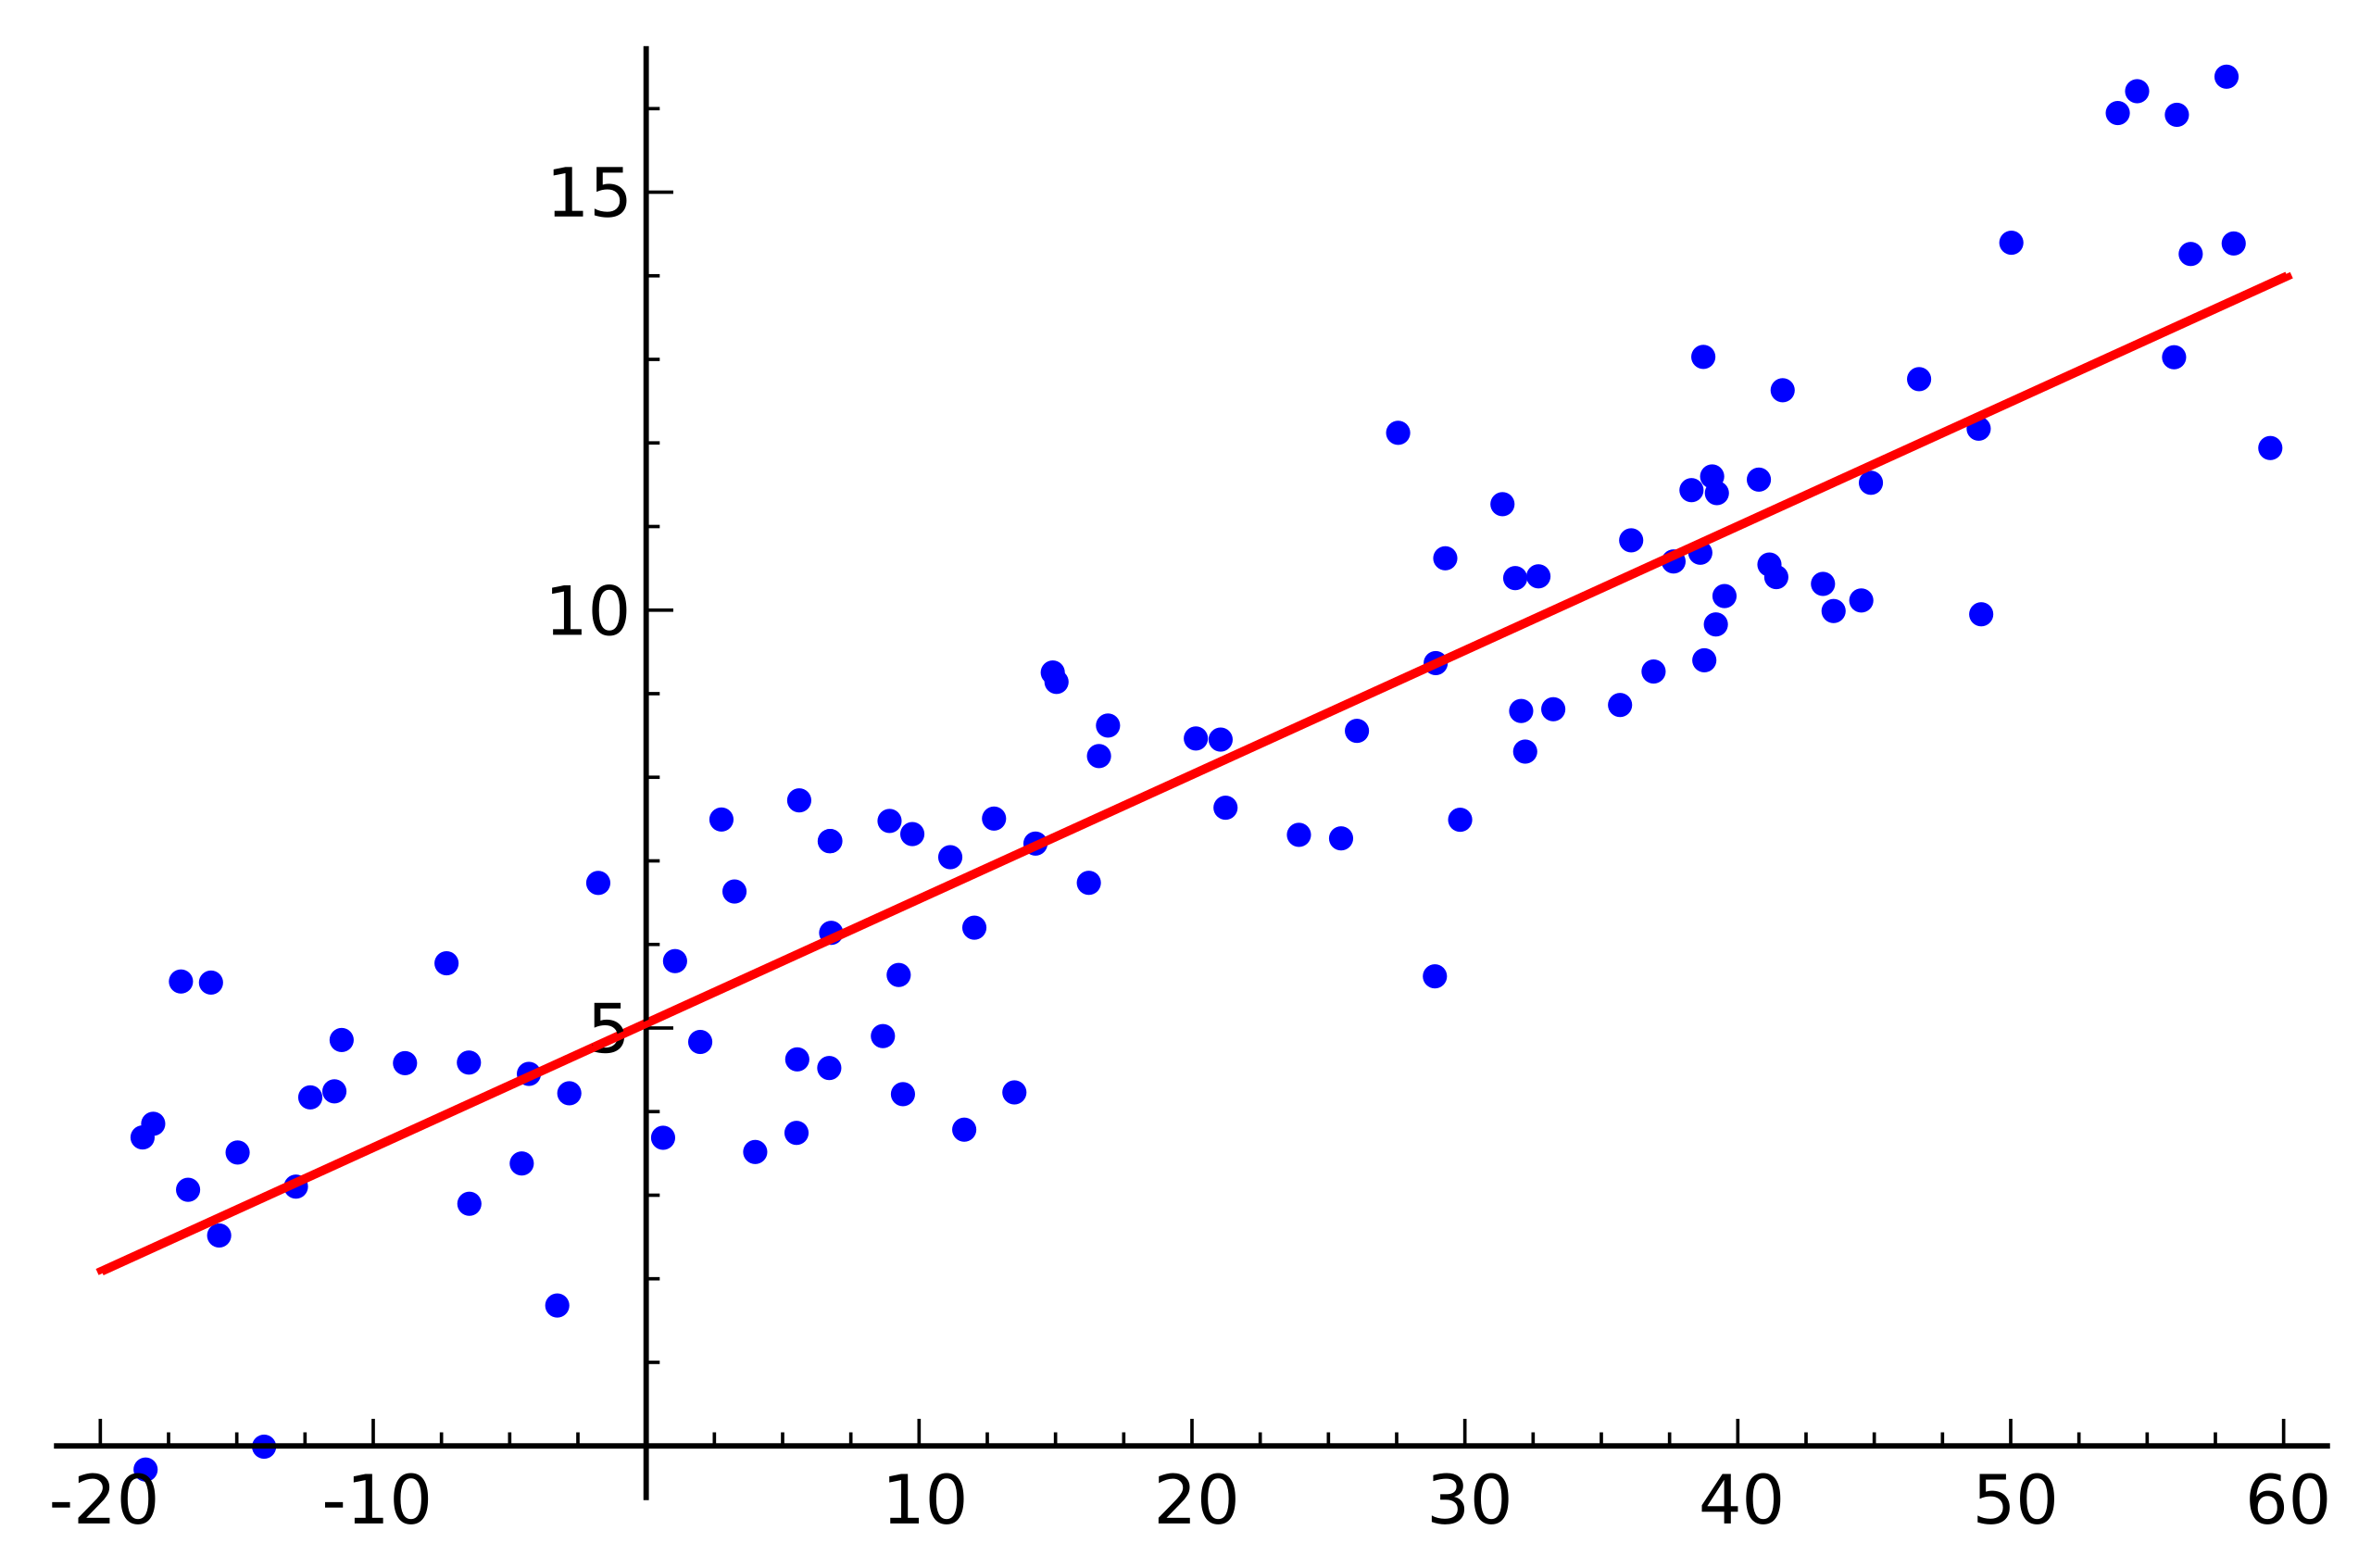

In [ ]:
# example of calculating OLS based on regression line
from IPython.display import Image
Image(filename='./img/ols.png')

We will use the anoerxia data again and try to explain the postweight based on pre-weight. We will find the best line that minimizes the least squared values using the ```linalg.lstsq``` function.

In [ ]:
# import linalg module from scipy
from scipy import linalg as linalg

# import matplotlib.pyplot to plot graphs
import matplotlib.pyplot as plt
%matplotlib inline

The [```linalg.lstsq(a,b)```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) function requires 2 parameters. a is a matrix of predictor variables, while b is an array of target variable. In this example, a would be the pre-weight and the target variable would be the post-weight data.

The function returns 4 values, which you can check out the details [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html). For right now, we're interested in only the first one, which is an array containing the coefficent m and the intercept constant c.


In [ ]:
# transform the prewt and postwt Series as numpy arrays
# using df.as_matrix() function
# this transformation is needed to use the lstsq function

prewt_arr = df.prewt.values #as_matrix()
postwt_arr = df.postwt.values #as_matrix()

# verify transformation
print(type(prewt_arr))
print(type(postwt_arr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# transform the preweight array as a matrix
A = np.vstack([prewt_arr, np.ones(len(prewt_arr))]).T

In [ ]:
# find the coefficent and the intercept constant
# using the lstsq function
m, c = linalg.lstsq(A,postwt_arr)[0]

print("Coefficent", m)
print("Constant:", c)

Coefficent 0.5153804268499989
Constant: 42.70058021289188


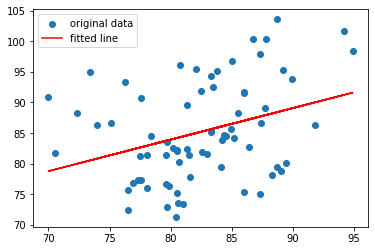

In [ ]:
# plot the original data as scatterplot
plt.scatter(prewt_arr, postwt_arr, label = 'original data')

# plot the best fit line based on the least squared values
plt.plot(prewt_arr, (m * prewt_arr + c), 'r', label = 'fitted line')

# show the plot
plt.legend()

---